# Creating a Filter, Edge Detection

### Import resources and display image

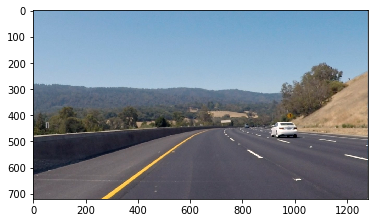

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('images/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

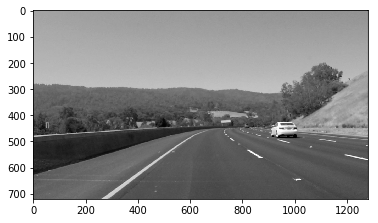

In [2]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="images/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

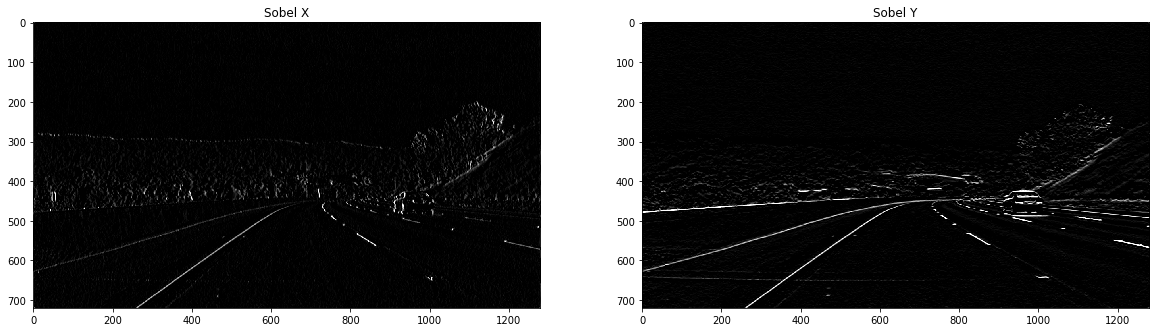

In [13]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                    [ 0, 0, 0], 
                    [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])


# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
horiz_filtered_image = cv2.filter2D(gray, -1, sobel_x)
vert_filtered_image = cv2.filter2D(gray, -1, sobel_y)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title("Sobel X")
ax1.imshow(horiz_filtered_image, cmap='gray')
ax2.set_title("Sobel Y")
ax2.imshow(vert_filtered_image, cmap='gray')
plt.show()

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



### various sensitivities for sobel Y

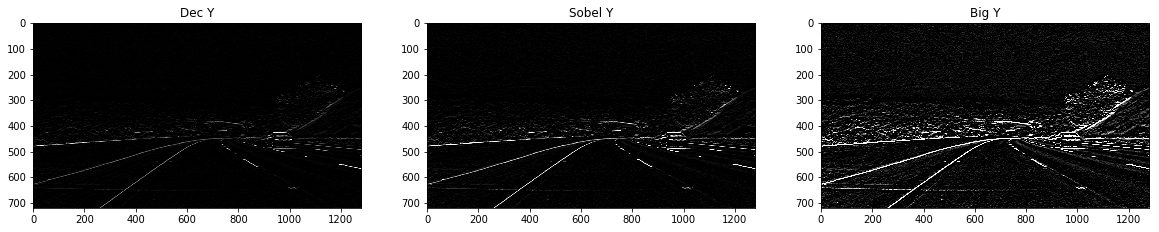

In [18]:
decimal_vert_filter = np.array([[-0.5, -1, -0.5],
                                [  0,   0,   0],
                                [ 0.5,  1,  0.5]])
big_vert_filter = np.array([[-4, -8, -4],
                                [ 0,  0,  0],
                                [ 4,  8,  4]])
dec_vert_filtered_image = cv2.filter2D(gray, -1, decimal_vert_filter)
big_vert_filtered_image = cv2.filter2D(gray, -1, big_vert_filter)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title("Dec Y")
ax1.imshow(dec_vert_filtered_image, cmap='gray')
ax2.set_title("Sobel Y")
ax2.imshow(vert_filtered_image, cmap='gray')
ax3.set_title("Big Y")
ax3.imshow(big_vert_filtered_image, cmap='gray')
plt.show()

### 5x5 kernel

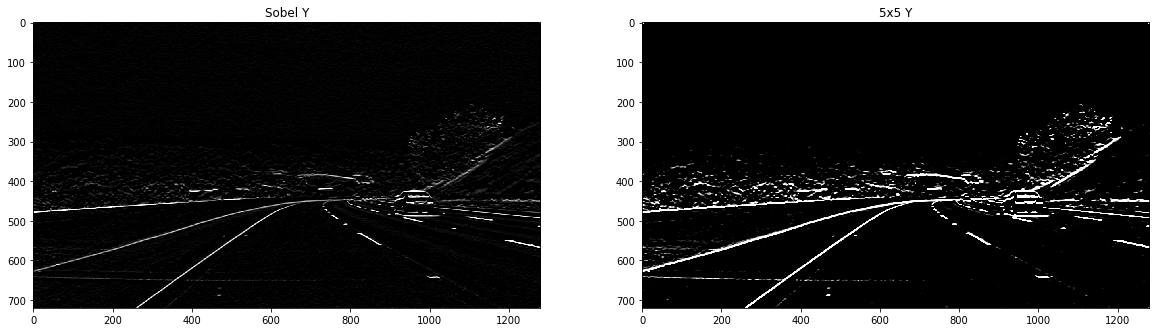

In [24]:
large_vert_filter = np.array([[-2, -2, -4, -2, -2],
                              [-1, -1, -2, -1, -1],
                              [ 0,  0,  0,  0,  0],
                              [ 1,  1,  2,  1,  1],
                              [ 2,  2,  4,  1,  2]])
large_vert_filtered_image = cv2.filter2D(gray, -1, large_vert_filter)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title("Sobel Y")
ax1.imshow(vert_filtered_image, cmap='gray')
ax2.set_title("5x5 Y")
ax2.imshow(large_vert_filtered_image, cmap='gray')
plt.show()

### low-pass filter

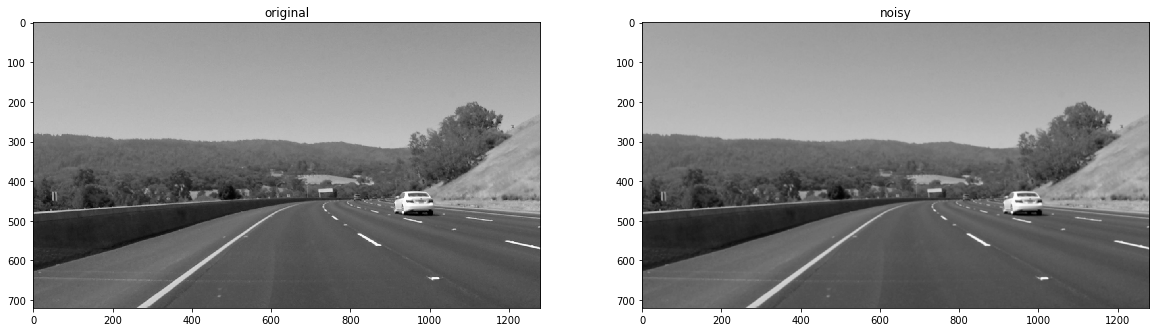

In [27]:
low_pass_filter = np.array([[1/9, 1/9, 1/9], 
                            [1/9, 1/9, 1/9],  
                            [1/9, 1/9, 1/9]])
noised_image = cv2.filter2D(gray, -1, low_pass_filter)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title("original")
ax1.imshow(gray, cmap='gray')
ax2.set_title("noisy")
ax2.imshow(noised_image, cmap='gray')
plt.show()

### low-pass to reduce noise in edge detection (high pass)

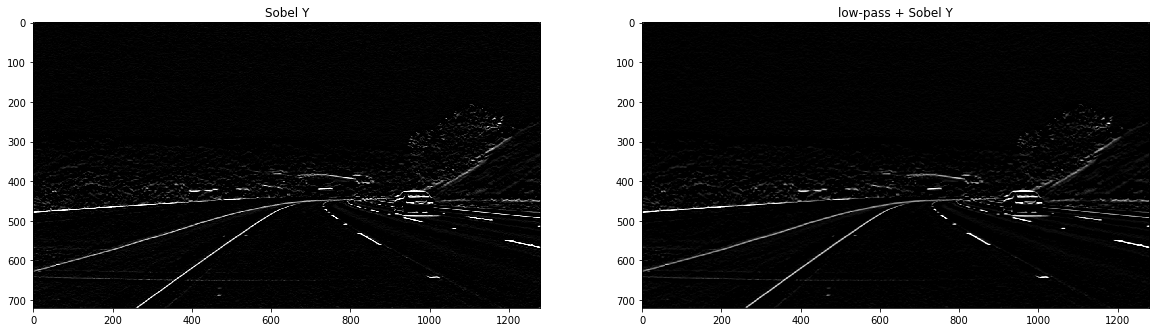

In [30]:
blurred = cv2.filter2D(gray, -1, low_pass_filter)
enhanced_edge_detection = cv2.filter2D(blurred, -1, sobel_y)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title("Sobel Y")
ax1.imshow(vert_filtered_image, cmap='gray')
ax2.set_title("low-pass + Sobel Y")
ax2.imshow(enhanced_edge_detection, cmap='gray')
plt.show()